In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [2]:
df_titanic=pd.read_csv('train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229DF9CCEB8>]],
      dtype=object)

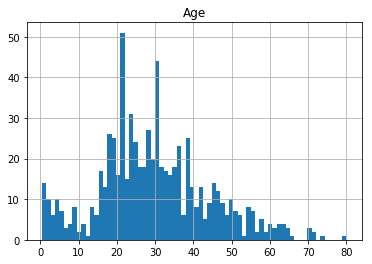

In [5]:
df_titanic.hist('Age',bins=70)

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

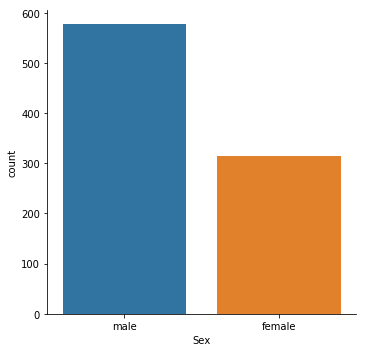

In [9]:
sns.catplot('Sex',data=df_titanic,kind="count")

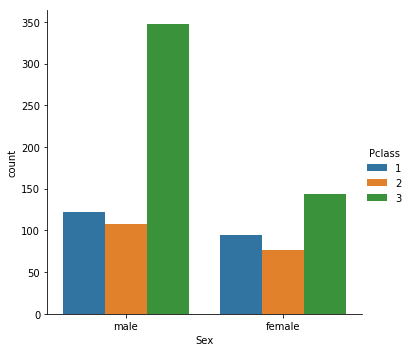

In [10]:
sns.catplot('Sex',data=df_titanic,kind="count",hue="Pclass")

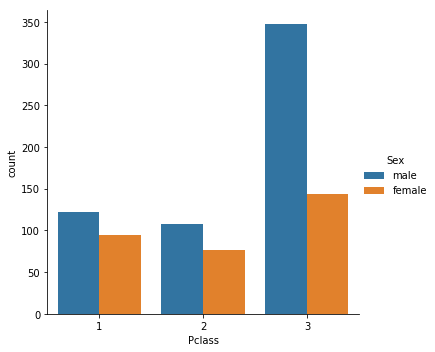

In [11]:
sns.catplot('Pclass',data=df_titanic,kind="count",hue="Sex")

In [12]:
def men_women_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
df_titanic['Person']=df_titanic[['Age','Sex']].apply(men_women_child,axis=1)

In [14]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


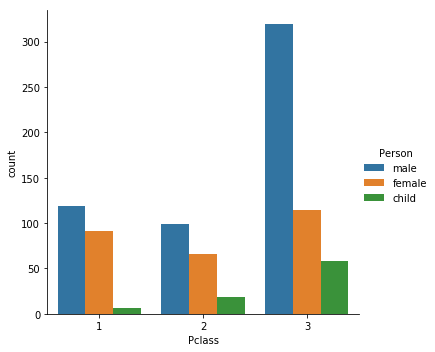

In [15]:
sns.catplot('Pclass',data=df_titanic,kind="count",hue="Person")

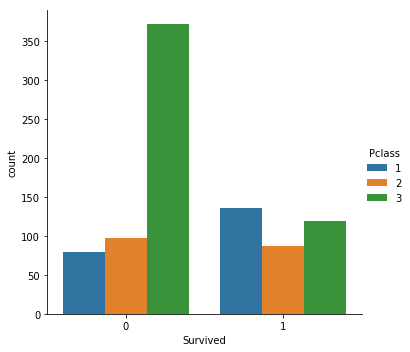

In [16]:
sns.catplot('Survived',data=df_titanic,kind="count",hue='Pclass',)

In [17]:
df_titanic.pivot_table(index=['Person'],columns=['Survived'],aggfunc='count')

Age      Cabin     Embarked      Fare      Name       ...  \
Survived    0    1     0   1        0    1    0    1    0    1  ...   
Person                                                          ...   
child      34   49     2  11       34   49   34   49   34   49  ...   
female     49  169     4  87       66  203   66  205   66  205  ...   
male      341   72    62  38      449   88  449   88  449   88  ...   

         PassengerId      Pclass       Sex      SibSp      Ticket       
Survived           0    1      0    1    0    1     0    1      0    1  
Person                                                                  
child             34   49     34   49   34   49    34   49     34   49  
female            66  205     66  205   66  205    66  205     66  205  
male             449   88    449   88  449   88   449   88    449   88  

[3 rows x 22 columns]

In [18]:
df_titanic['Age'].mean()

29.69911764705882

In [19]:
df_titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

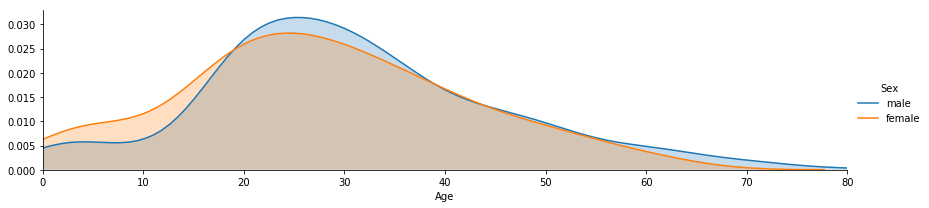

In [20]:
fig = sns.FacetGrid(df_titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=df_titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

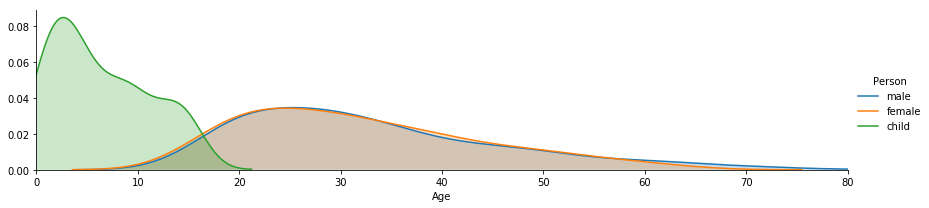

In [21]:
fig = sns.FacetGrid(df_titanic,hue='Person',aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=df_titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

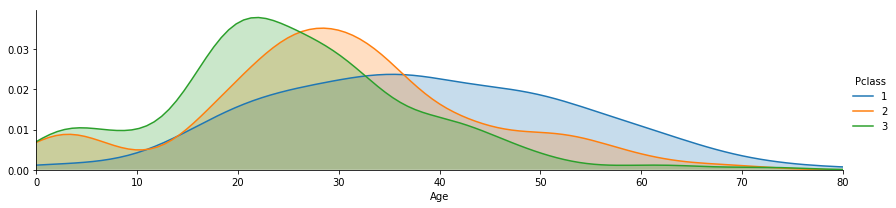

In [22]:
fig = sns.FacetGrid(df_titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=df_titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [23]:
deck = df_titanic['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

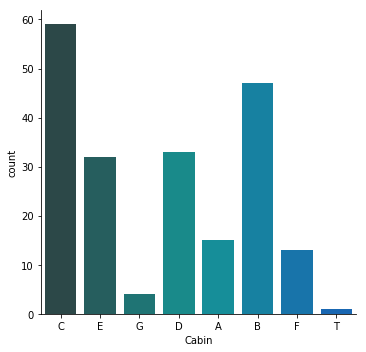

In [25]:
levels = []

for l in deck:
    levels.append(l[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot('Cabin',data=cabin_df,kind="count",palette='winter_d')


In [26]:
cabin_df=cabin_df[cabin_df.Cabin!='T']

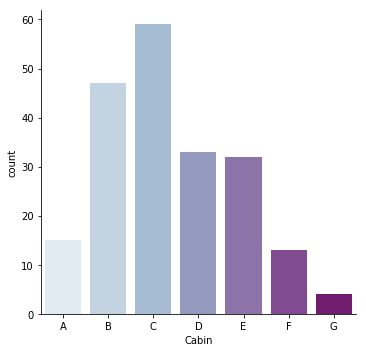

In [27]:
sns.catplot('Cabin',data=cabin_df,kind="count",palette='BuPu',order=['A','B','C','D','E','F','G'])

In [28]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


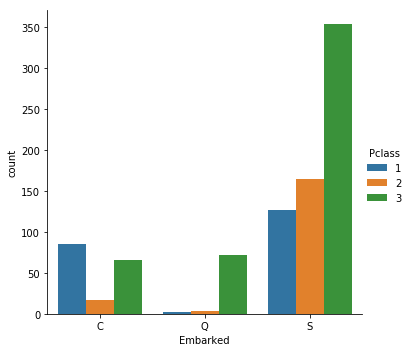

In [29]:
sns.catplot('Embarked',data=df_titanic,kind='count',hue='Pclass',order=['C','Q','S'])

In [30]:
df_titanic['Alone']=df_titanic.SibSp + df_titanic.Parch

In [31]:
df_titanic['Alone'].loc[df_titanic['Alone'] >0]="With Family"

df_titanic['Alone'].loc[df_titanic['Alone'] ==0]="Alone"



C:\Users\f8026379\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


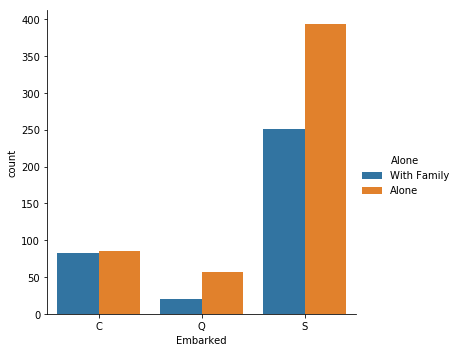

In [33]:
sns.catplot('Embarked',data=df_titanic,kind='count',hue='Alone',order=['C','Q','S'])

In [34]:
df_titanic['Survivor']=df_titanic.Survived.map({0:'no',1:'Yes'})

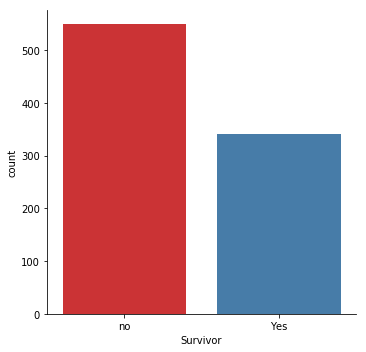

In [35]:
sns.catplot('Survivor',data=df_titanic,kind='count',palette='Set1')

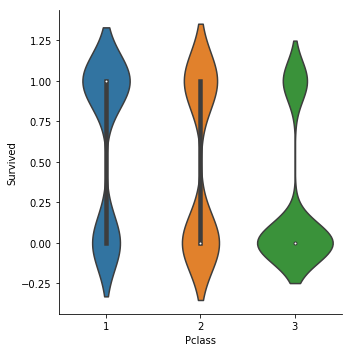

In [36]:
sns.catplot('Pclass','Survived',data=df_titanic,kind='violin')

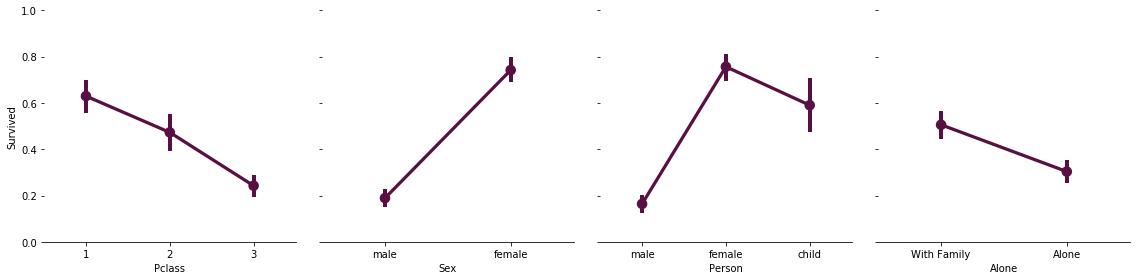

In [45]:
g = sns.PairGrid(df_titanic, y_vars="Survived",
                 x_vars=["Pclass", "Sex", "Person", "Alone"],
                 height=4, aspect=1)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.2, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

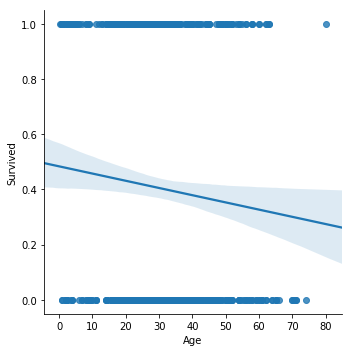

In [46]:
sns.lmplot('Age','Survived',data=df_titanic)

In [54]:
generations = [10,20,40,60,80]

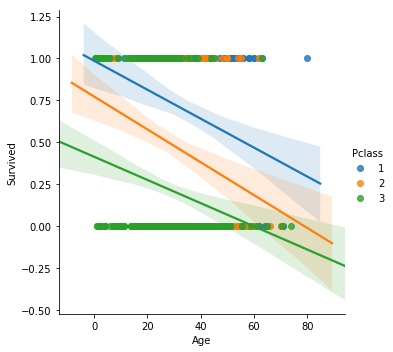

In [55]:
sns.lmplot('Age','Survived',hue='Pclass',data=df_titanic)

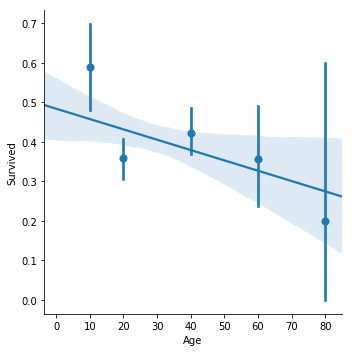

In [56]:
sns.lmplot('Age','Survived',data=df_titanic,x_bins=generations)

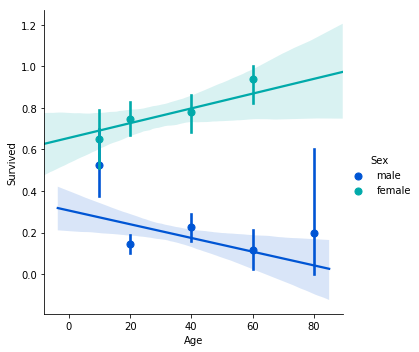

In [59]:
sns.lmplot('Age','Survived',hue='Sex',data=df_titanic,x_bins=generations,palette='winter')

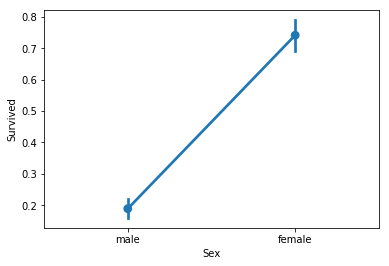

In [64]:
sns.pointplot('Sex','Survived',data=df_titanic)